In [30]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalles = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Análisis Exploratorio

## Vamos a anlizar el set de datos de avisos_detalles

### Empezamos dandole un vistazo

In [3]:
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


### Vemos que las columnas 'ciudad' y 'nombre_zona' casi no tienen ocurrencias, por lo que no las vamos a usar. Además son muy pocas las filas a las que le falta denominación empresa, por lo que en un principio vaos a quitar estas filas tambien para tener los datos completos y hacer un mejor análisis inicial.

In [4]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


In [6]:
avisos_detalles = avisos_detalles.dropna(axis = 0, subset = ['denominacion_empresa'], how = 'any')
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13529 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13529 non-null int64
idpais                  13529 non-null int64
titulo                  13529 non-null object
descripcion             13529 non-null object
nombre_zona             13529 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13529 non-null object
nivel_laboral           13529 non-null object
nombre_area             13529 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


## Le damos un vistazo a cada columna así tendremos un mejor conocimiento del set de datos

In [7]:
avisos_detalles['idaviso'].value_counts().head()

1112381437    1
1112306395    1
1112226562    1
1111335681    1
1112320768    1
Name: idaviso, dtype: int64

### Como era de esperar los ids son todos distintos

In [8]:
avisos_detalles['descripcion'].describe()

count                                                 13529
unique                                                12669
top       <p>Nos encontramos en la búsqueda de un ANALIS...
freq                                                     19
Name: descripcion, dtype: object

In [9]:
avisos_detalles['titulo'].describe()

count                                                 13529
unique                                                11645
top       Analistas de Testing Ssr/Sr con Automatización...
freq                                                     22
Name: titulo, dtype: object

#### Estas columnas son muy dispersas, ya que vemos que hay casi tantos valores únicos como filas. Sin embargo nos llama la atención que, sobre todo en la columna 'descripción' hay algunos cuantos valores iguales


### Columna: "tipo_de_trabajo"

In [10]:
avisos_detalles['tipo_de_trabajo'].describe()

count         13529
unique            9
top       Full-time
freq          12335
Name: tipo_de_trabajo, dtype: object

In [11]:
avisos_detalles['tipo_de_trabajo'].value_counts()

Full-time          12335
Part-time            862
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

### Ya que hay pocos valores posibles para esta columna, la vamos a convertir el tipo de dato en categoría, así ahorramos memoria y nos facilita algunos plots y análisis posteriores

In [12]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('category')

### También vamos a plasmar en un gráfico las apariciones de cada categoría

In [13]:
def autolabel(rects, mysize):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(1.05*width,rect.get_y() + rect.get_height()/2.,
                '%d' % int(width),
                ha='left', va='center',size = mysize)

In [14]:
values = avisos_detalles['tipo_de_trabajo'].value_counts().values
indexes = avisos_detalles['tipo_de_trabajo'].value_counts().index
indexes

CategoricalIndex(['Full-time', 'Part-time', 'Teletrabajo', 'Por Horas',
                  'Pasantia', 'Temporario', 'Por Contrato', 'Fines de Semana',
                  'Primer empleo'],
                 categories=['Fines de Semana', 'Full-time', 'Part-time', 'Pasantia', 'Por Contrato', 'Por Horas', 'Primer empleo', 'Teletrabajo', ...], ordered=False, dtype='category')

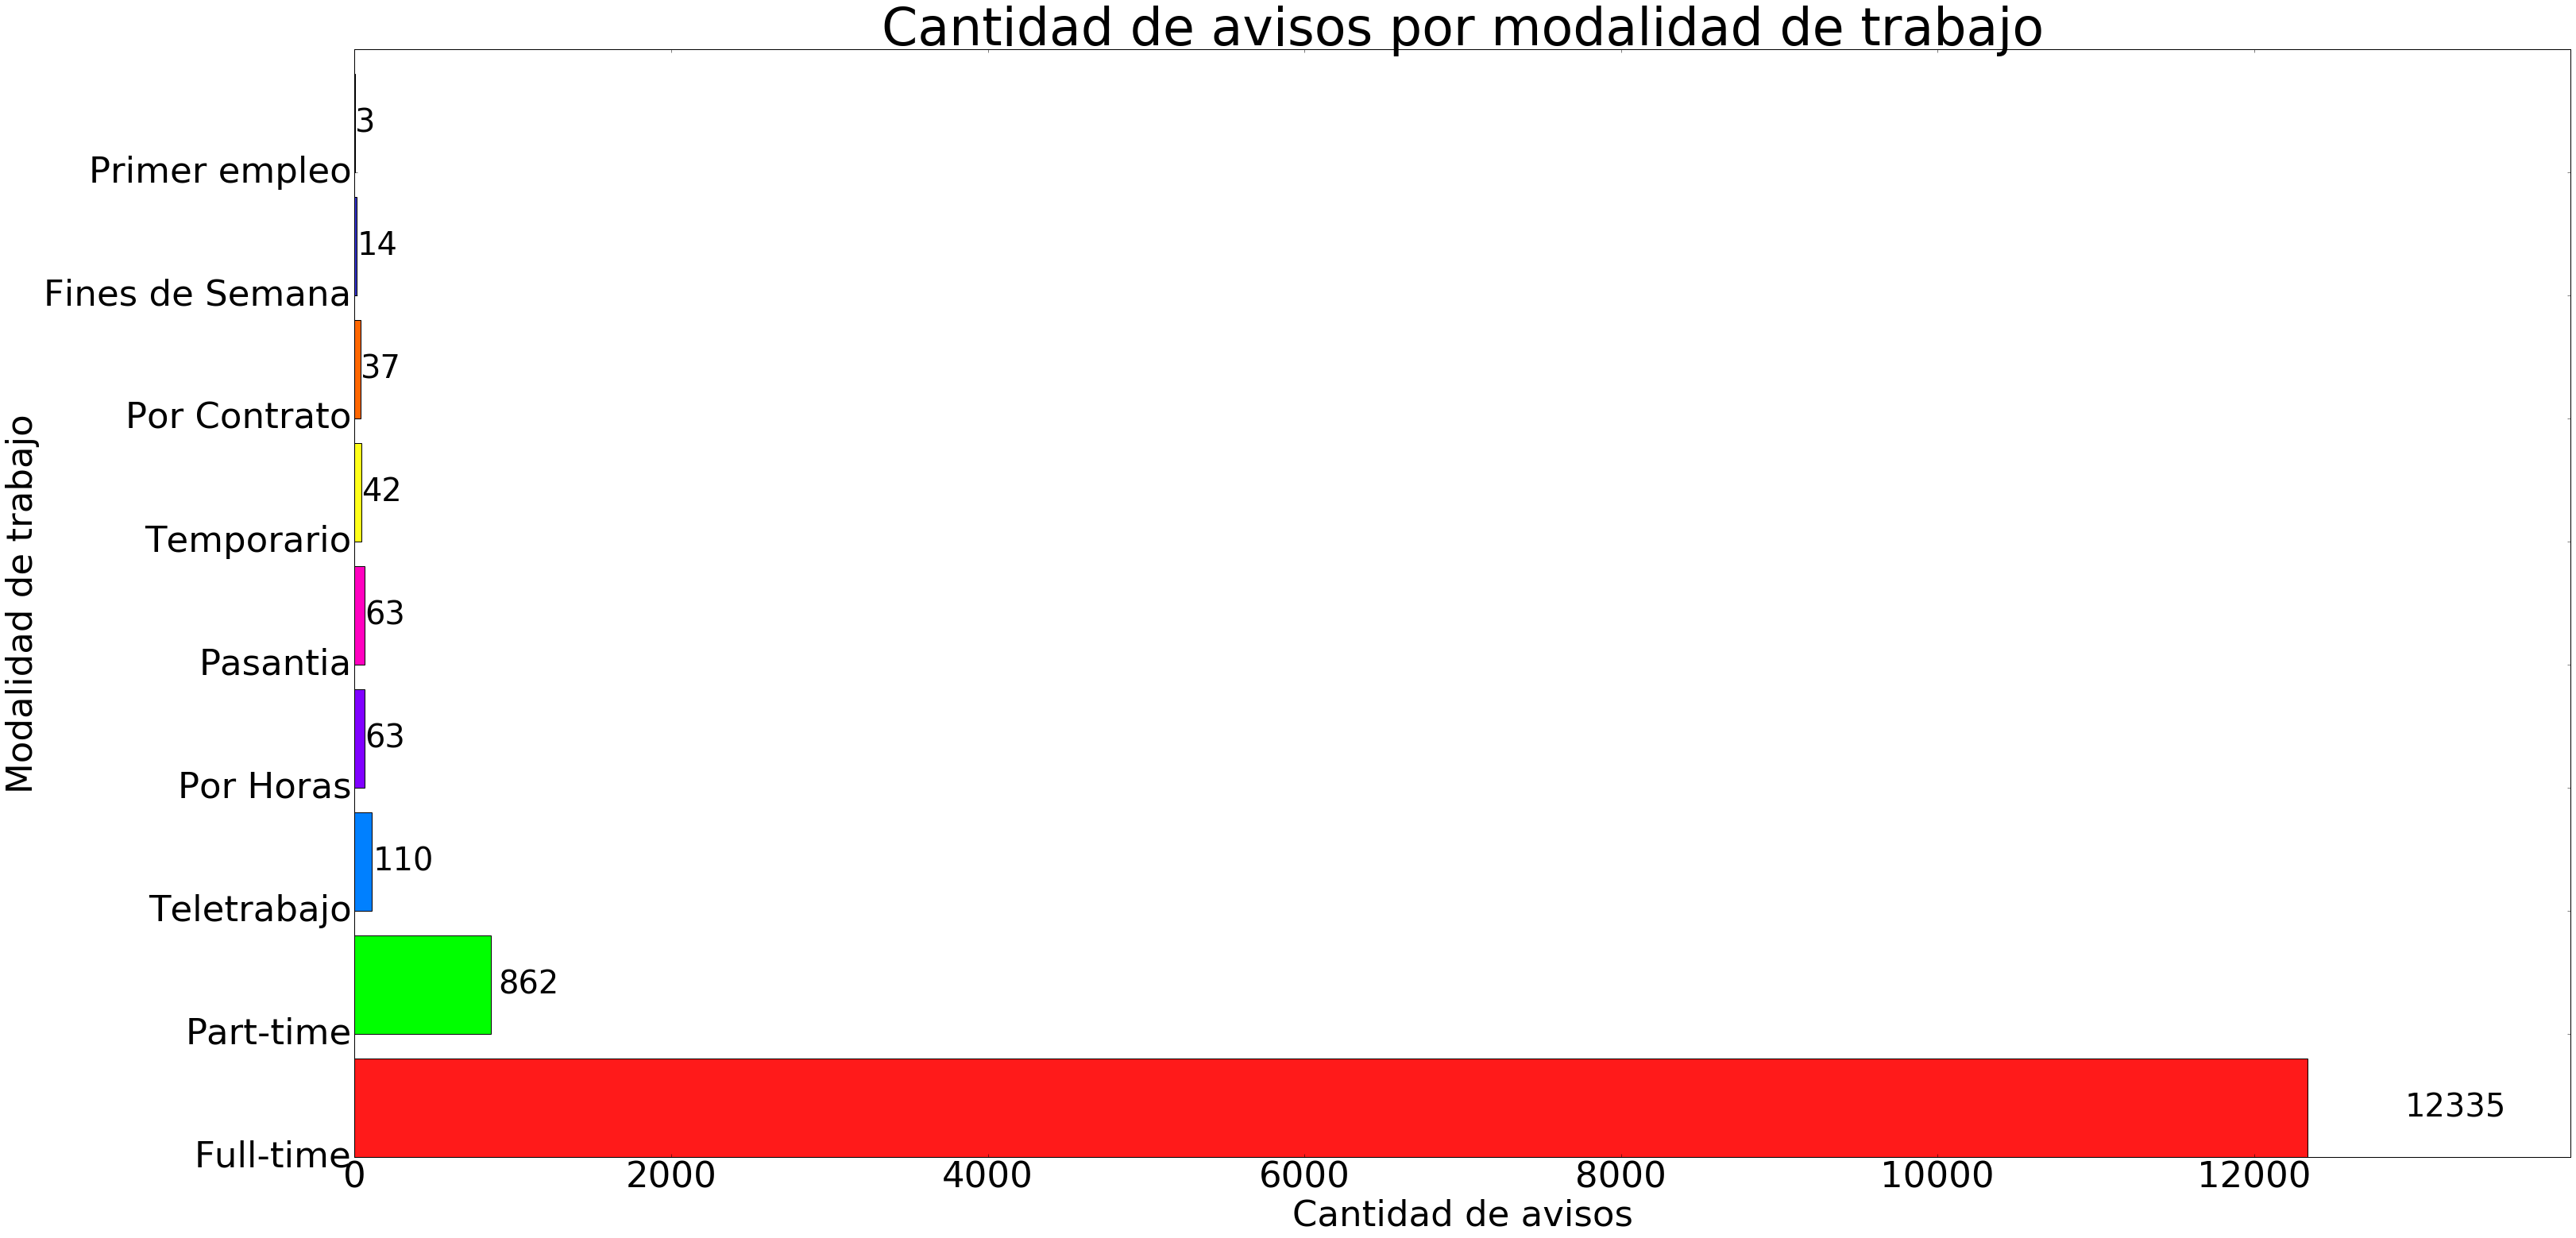

In [15]:
fig, ax = plt.subplots(figsize=(50,25))
autolabel(ax.barh(np.arange(9), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a','#ff6600', '#3333cc', '#ff80aa' ]), 40)
ax.set_yticks(np.arange(9))
ax.set_yticklabels(indexes, size = 45)
ax.set_xticklabels([0, 2000,4000,6000,8000,10000,12000], size = 45)
ax.set_title('Cantidad de avisos por modalidad de trabajo', size = 65)
ax.set_xlabel('Cantidad de avisos', size = 45)
ax.set_ylabel('Modalidad de trabajo', size = 45)

#### Como hay un gran porcentaje de trabajos ful-time, no se llega a ver bien la distribucion. Vamos a excluir los full-time en una nueva vizualización.

In [16]:
values = avisos_detalles.loc[avisos_detalles['tipo_de_trabajo'] != 'Full-time']['tipo_de_trabajo'].value_counts().values
indexes = avisos_detalles.loc[avisos_detalles['tipo_de_trabajo'] != 'Full-time']['tipo_de_trabajo'].value_counts().index

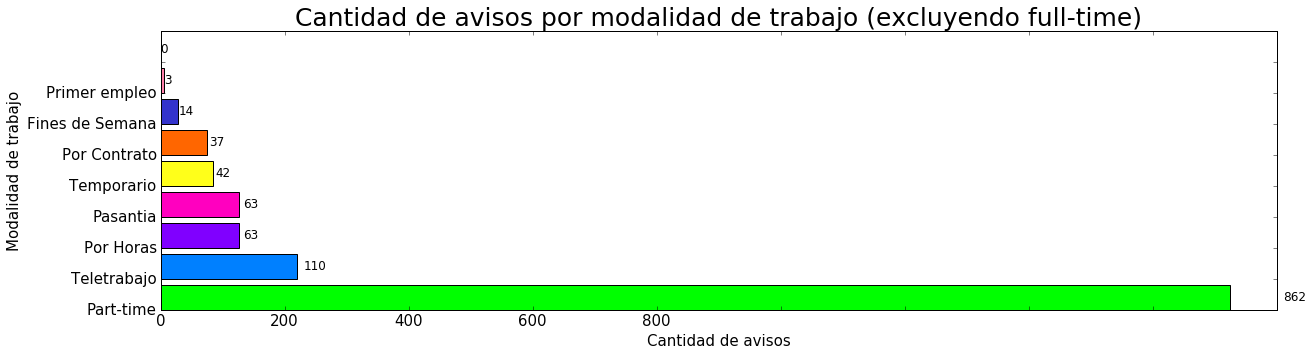

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
autolabel(ax.barh(np.arange(9), values ,   color = ['#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a','#ff6600', '#3333cc', '#ff80aa' ]),12)
ax.set_yticks(np.arange(9))
indexes = [ u'Part-time', u'Teletrabajo', u'Por Horas',
                  u'Pasantia', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo']
ax.set_yticklabels(indexes, size = 15)
ax.set_xticklabels([0, 200,400,600,800], size = 15)
ax.set_title('Cantidad de avisos por modalidad de trabajo (excluyendo full-time)', size = 25)
ax.set_xlabel('Cantidad de avisos', size = 15)
ax.set_ylabel('Modalidad de trabajo', size = 15)

### Los trabajos con modalidad full y part time, como era de esperar concentran a casi todos los avisos. Sin embargo nos resulta interesante que el tercer puesto se lo lleven los tele-trabajos.


## Columna: "nombre_zona"

In [18]:
avisos_detalles['nombre_zona'].describe()

count                 13529
unique                    4
top       Gran Buenos Aires
freq                  12649
Name: nombre_zona, dtype: object

In [19]:
avisos_detalles['nombre_zona'].value_counts()

Gran Buenos Aires              12649
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

In [20]:
avisos_detalles['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Buenos Aires Province        1
paternal                     1
Mendoza                      1
Vicente Lopez                1
República Argentina          1
Santa Rosa                   1
Barracas                     1
Microcentro                  1
Parque Patricios             1
Tortuguitas                  1
Zárate, Campana, Escobar     1
caba                         1
La Plata                     1
Name: ciudad, dtype: int64

#### Casi todos los trabajos se concentran en Gran Buenos Aires y Capital Federal. Sin embargo tomamos estos datos "con pinzas" porque el "Gran Buenos Aires" incluye a la Capital federal, y a "GBA Oeste". POr ejemplo, tenemos ocurrencias que dicen "Gran Buenos Aires" en "nombre_zona" y "Capital Federal" en "ciudad", que por cierto es un campo que habíamos decidido descartar por la poca cantidad de datos. Por lo tanto no podemos saber tampoco si hay más avisos de GBA que sean particularmente de la CABA.

In [23]:
avisos_detalles[avisos_detalles['nombre_zona'] == 'Gran Buenos Aires'][avisos_detalles['ciudad'] == 'CABA'].count()

/usr/lib/python3/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


idaviso                 2
idpais                  2
titulo                  2
descripcion             2
nombre_zona             2
ciudad                  2
mapacalle               0
tipo_de_trabajo         2
nivel_laboral           2
nombre_area             2
denominacion_empresa    2
dtype: int64

## Columna: "nivel_laboral"


In [24]:
avisos_detalles['nivel_laboral'].describe()

count                    13529
unique                       5
top       Senior / Semi-Senior
freq                      9404
Name: nivel_laboral, dtype: object

In [25]:
avisos_detalles['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9404
Junior                                  2216
Otro                                     919
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

### Ya que hay pocos valores posibles para esta columna, la vamos a convertir el tipo de dato en categoría, así ahorramos memoria y nos facilita algunos plots y análisis posteriores

In [27]:
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('category')
values = avisos_detalles['nivel_laboral'].value_counts().values
indexes = avisos_detalles['nivel_laboral'].value_counts().index
indexes = [u'Senior / Semi-Senior', u'Junior', u'Otro',
       u'Jefe / Supervisor / Responsable',
       u'Gerencia / Alta Gerencia / Direccion']

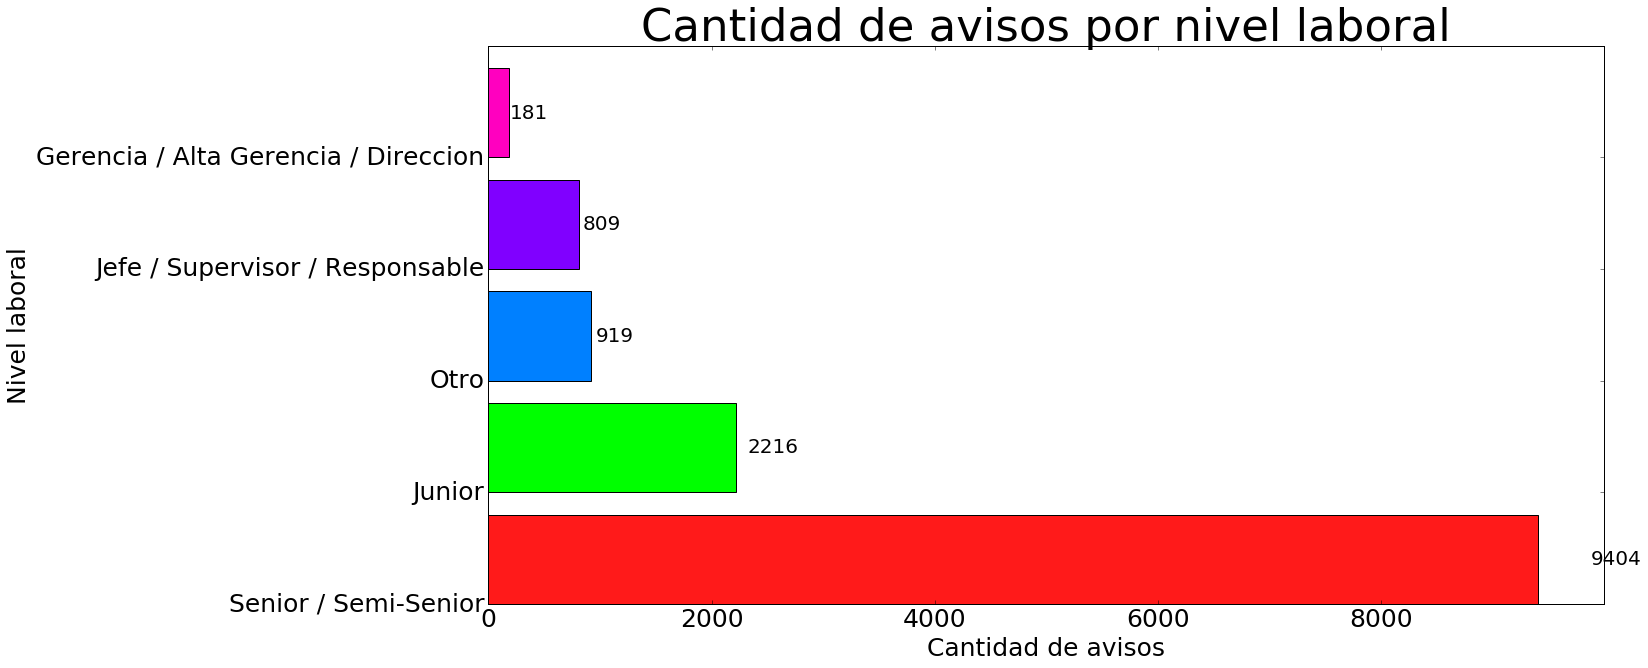

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a']), 20)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes, size = 25)
ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Cantidad de avisos por nivel laboral', size = 45)
ax.set_xlabel('Cantidad de avisos', size = 25)
ax.set_ylabel('Nivel laboral', size = 25)

## Columna "nombre_area"